# Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/adityachugh02/challenge-data-analysis/master/dataset-cleaned.csv",index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed: 0.1')]

In [90]:
df.shape

(13505, 19)

## Coorelation

In [17]:
df.corr()

,price,bedrooms,area,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,swimming_pool
price,1.000000,0.463783,0.456454,-0.002034,NaN,0.089865,0.359528,0.081158,0.157717,0.456454,0.274425,0.282330,0.073572
bedrooms,0.463783,1.000000,0.539719,0.008258,NaN,0.023220,0.251504,0.126362,0.107314,0.539719,0.152076,0.222707,0.079596
area,0.456454,0.539719,1.000000,-0.018060,NaN,-0.007630,0.251443,0.074501,0.109076,1.000000,0.204078,0.198807,0.021071
furnished,-0.002034,0.008258,-0.018060,1.000000,NaN,-0.016863,-0.052765,-0.051108,-0.005188,-0.018060,-0.013087,-0.017074,-0.003001
open_fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,0.089865,0.023220,-0.007630,-0.016863,NaN,1.000000,NaN,0.265256,-0.024647,-0.007630,-0.025003,0.144281,0.275141
terrace_area,0.359528,0.251504,0.251443,-0.052765,NaN,NaN,1.000000,0.125865,0.115141,0.251443,0.184762,0.224202,0.182002
garden,0.081158,0.126362,0.074501,-0.051108,NaN,0.265256,0.125865,1.000000,NaN,0.074501,0.012585,0.206679,0.207651
garden_area,0.157717,0.107314,0.109076,-0.005188,NaN,-0.024647,0.115141,NaN,1.000000,0.109076,0.553323,0.084019,-0.018147
surface,0.456454,0.539719,1.000000,-0.018060,NaN,-0.007630,0.251443,0.074501,0.109076,1.000000,0.204078,0.198807,0.021071


## Qualitative & Quantitative data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13505 entries, 0 to 13504
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          13505 non-null  object 
 1   proprety_type     13505 non-null  object 
 2   price             13505 non-null  int64  
 3   bedrooms          13505 non-null  float64
 4   area              13505 non-null  float64
 5   equipped_kitchen  13505 non-null  object 
 6   furnished         13505 non-null  float64
 7   open_fire         13505 non-null  float64
 8   terrace           13505 non-null  float64
 9   terrace_area      3696 non-null   float64
 10  garden            13505 non-null  float64
 11  garden_area       2182 non-null   float64
 12  surface           13505 non-null  float64
 13  surface_plot      13505 non-null  float64
 14  facades           13505 non-null  float64
 15  state             13505 non-null  object 
 16  swimming_pool     13505 non-null  float6

In [22]:
pd.get_dummies(df['state']).sum()   # Based on dummy data trying to convert it into quantitative data

 As new            2517
 Good              3479
 Just renovated     476
 To be done up     1341
 To renovate       1617
 To restore         127
Good               3948
dtype: int64

In [ ]:
# Converting qualitative data to quantitative data using dummies for state
def state(entry):
    if pd.isnull(entry) or entry == 'None':
        return 1
    elif entry == 'To restore':
        return 6
    elif entry == 'Just renovated':
        return 5
    elif entry == 'To be done up':
        return 4
    elif entry == "To renovate":
        return 3
    elif entry == "As new":
        return 2
    elif entry == "Good":
        return 1
    else:
        return str(entry)
state("Good")

In [23]:
pd.get_dummies(df['equipped_kitchen']).sum()

Hyper equipped        1071
Installed             8967
Not installed          917
Semi equipped         1487
USA hyper equipped     692
USA installed          275
USA semi equipped       86
USA uninstalled         10
dtype: int64

In [ ]:
# Converting qualitative data to quantitative data using dummies for state
def equipped_kitchen(entry):
    if pd.isnull(entry) or entry == 'None':
        return 2
    elif entry == 'USA uninstalled':
        return 8
    elif entry == 'USA semi equipped':
        return 7
    elif entry == 'USA installed':
        return 6
    elif entry == 'USA hyper equipped':
        return 5
    elif entry == 'Semi equipped':
        return 4
    elif entry == "Not installed":
        return 3
    elif entry == "Installed":
        return 2
    elif entry == "Hyper equipped":
        return 1
    else:
        return str(entry)
equipped_kitchen("Not installed")

In [24]:
pd.get_dummies(df['proprety_type']).sum()

-                                       1
2 Roi Baudouin                          1
2019 Residentie Groenling Mariekerke    1
22 kots vendre prs du                   1
3 maisons dans un nouvel                1
                                       ..
bouwgronden en woningen o               1
nieuwe woningen en bouwgr               2
pole St Lonard                          1
rvert Antwerpen                         1
val vna apibw A B - 2                   1
Length: 470, dtype: int64

In [26]:
# As there different names for property type,so we have divided it into 3 main types:house, appartment and others
def property_type(entry):
    if pd.isnull(entry) or entry == 'None':
        return 3
    elif entry == "House":
        return 1
    elif entry == "Appartment":
        return 2
    else:
        return 3
    
property_type("2 Roi Baudouin")

3

In [27]:
pd.get_dummies(df['locality'])         

,1000 BRUXELLES,1000 BRUXELLES 1,1000 Brussel,1000 Brussels,1000 Brussels City,1000 Bruxelles,1000 Bruxelles 1,1000 Bruxelles ville,1000 Bruxelles1,1020 BRUXELLES,...,9970 Kaprijke,9971 Lembeke,9980 Sint-Laureins,9982 Sint-Jan-in-Eremo,9988 Waterland-oudeman,9990 Maldegem,9991 Adegem,9991 Maldegem Adegem,9992 Maldegem Middelburg,9992 Middelburg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Percentage of Missing Values

In [35]:
# Reading csv of uncleaned data

data = pd.read_csv("https://raw.githubusercontent.com/adityachugh02/challenge-data-analysis/master/dataset-not-cleaned.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed: 0')]

# Pencatage of missing data in uncleaned data
data.isnull().sum()*100/len(data)

locality              0.000000
proprety_type         0.000000
price                 0.000000
bedrooms             11.395779
area                 29.707516
equipped_kitchen     40.584969
furnished            34.091077
open_fire           100.000000
terrace              72.632358
terrace_area         72.632358
garden               83.843021
garden_area          83.843021
surface              29.707516
surface_plot         54.935209
facades              30.292484
state                29.233617
swimming_pool        93.780081
dtype: float64

In [36]:
# Pencatage of missing data in cleaned data
df.isnull().sum()*100/len(df)

locality             0.000000
proprety_type        0.000000
price                0.000000
bedrooms             0.000000
area                 0.000000
equipped_kitchen     0.000000
furnished            0.000000
open_fire            0.000000
terrace              0.000000
terrace_area        72.632358
garden               0.000000
garden_area         83.843021
surface              0.000000
surface_plot         0.000000
facades              0.000000
state                0.000000
swimming_pool        0.000000
dtype: float64

## Finding Outliers

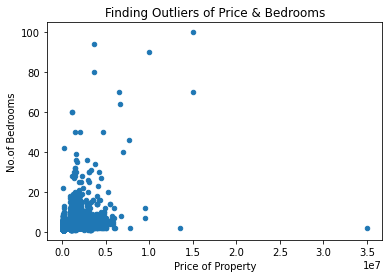

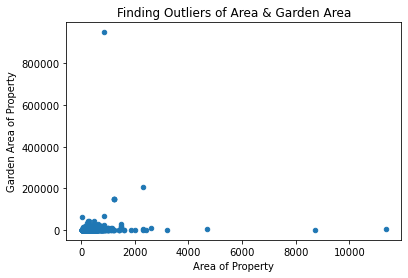

In [110]:
df.plot(kind = 'scatter', x = 'price', y = 'bedrooms')
plt.title("Finding Outliers of Price & Bedrooms")
plt.xlabel("Price of Property")
plt.ylabel("No.of Bedrooms")
plt.show()

df.plot(kind = "scatter", x = "area", y= "garden_area")
plt.title("Finding Outliers of Area & Garden Area")
plt.xlabel("Area of Property")
plt.ylabel("Garden Area of Property")
plt.show()

In [47]:
print(df["price"].max()) # As it an complete appartment
print(df["price"].min()) 

35000000
35000


In [105]:
df[df["price"]== 35000000]

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3144,3150 Haacht,Apartment block,35000000,2.0,201.436848,Installed,0.0,0.0,0.0,NaN,0.0,NaN,201.436848,201.436848,4.0,Good,0.0,3150,173751.725725


In [102]:
print(df["bedrooms"].max()) # It is beacuse it is an appartment block
print(df["bedrooms"].min())

100.0
1.0


In [104]:
df[df["bedrooms"]== 100.0]

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3145,7021 Havr,Apartment block,15000000,100.0,8800.0,Not installed,0.0,0.0,0.0,NaN,0.0,NaN,8800.0,45000.0,4.0,Just renovated,0.0,7021,1704.545455


In [107]:
print(df["garden_area"].max()) # it is not possible as garden_area is bigger than the surface_plot (wrong data)
print(df["garden_area"].min())

950002.0
1.0


In [106]:
df[df["garden_area"]== 950002.0] 

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3531,1850 Grimbergen,Castle,2480000,10.0,850.0,Installed,0.0,0.0,0.0,NaN,1.0,950002.0,850.0,95000.0,4.0,To be done up,0.0,1850,2917.647059


## What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)

In [57]:
df["locality_code"] = df.locality.apply(lambda x: int(x[:4])) # create a new column with the postcode
df["price_square_meters"] = df["price"]/df["surface"]

In [51]:
# create new dataframe for Flanders

flemish_brabant = df[(df.locality_code >= 1500) & (df.locality_code <= 1999)]
antwerp = df[(df.locality_code >= 2000) & (df.locality_code <= 2999)]
flemish_brabant2 = df[(df.locality_code >= 3000) & (df.locality_code <= 3499)]
limburg = df[(df.locality_code >= 3500) & (df.locality_code <= 3999)]
west_flanders = df[(df.locality_code >= 8000) & (df.locality_code <= 8999)]
east_flanders = df[(df.locality_code >= 9000) & (df.locality_code <= 9999)]

df_flanders = pd.concat([flemish_brabant, antwerp, flemish_brabant2, limburg, west_flanders, east_flanders], axis=0)

In [108]:
# Average Price 
df_flanders.groupby("locality_code")["price_square_meters"].mean().sort_values(ascending=False).head(5)

locality_code
3150    60854.146670
2240    14768.896687
8300    11647.111364
8301     9075.998958
1950     8095.338768
Name: price_square_meters, dtype: float64

In [109]:
df_flanders[df_flanders["locality_code"]== 3150] # Data is affected by extreme values

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3144,3150 Haacht,Apartment block,35000000,2.0,201.436848,Installed,0.0,0.0,0.0,NaN,0.0,NaN,201.436848,201.436848,4.0,Good,0.0,3150,173751.725725
3803,3150 Haacht,House,1950000,8.0,500.000000,Hyper equipped,0.0,0.0,0.0,NaN,0.0,NaN,500.000000,100000.000000,4.0,Good,0.0,3150,3900.000000
7688,3150 Tildonk,Manor house,1375000,3.0,280.000000,Hyper equipped,0.0,0.0,1.0,50.0,0.0,NaN,280.000000,17000.000000,4.0,As new,0.0,3150,4910.714286


In [69]:
df_flanders[df_flanders["locality_code"]== 2240] # Data is affected by extreme values

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3377,2240 Zandhoven,House,2975000,5.0,201.436848,USA hyper equipped,0.0,0.0,0.0,NaN,0.0,NaN,201.436848,29361.0,4.0,As new,0.0,2240,14768.896687


#### Most expensive area in flanders is 8300 Knokke-Heist

In [70]:
df_flanders[df_flanders["locality_code"]== 8300]

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3158,8300 Knokke-Heist Knokke,Exceptional property,5900000,12.0,995.000000,Installed,0.0,0.0,0.0,NaN,0.0,NaN,995.000000,995.000000,2.0,Good,0.0,8300,5929.648241
3160,8300 Knokke,House,5900000,2.0,1000.000000,Installed,0.0,0.0,0.0,NaN,0.0,NaN,1000.000000,250.000000,2.0,Good,0.0,8300,5900.000000
3169,8300 Knokke-Heist,Villa,5250000,5.0,368.000000,USA hyper equipped,0.0,0.0,0.0,NaN,1.0,1143.0,368.000000,1143.000000,4.0,As new,0.0,8300,14266.304348
3177,8300 Knokke-Heist,Ground floor,4950000,4.0,188.000000,Hyper equipped,0.0,0.0,0.0,NaN,1.0,350.0,188.000000,188.000000,3.0,As new,0.0,8300,26329.787234
3180,8300 Knokke-Heist,Ground floor,4950000,4.0,188.000000,USA hyper equipped,0.0,0.0,0.0,NaN,0.0,NaN,188.000000,188.000000,3.0,Good,0.0,8300,26329.787234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12343,8300 Knokke-Heist,Apartment,915000,2.0,201.436848,Installed,0.0,0.0,1.0,38.0,0.0,NaN,201.436848,201.436848,2.0,As new,0.0,8300,4542.366544
12403,8300 Knokke-Heist,Apartment,899000,3.0,201.436848,Installed,0.0,0.0,0.0,NaN,0.0,NaN,201.436848,201.436848,2.0,Good,0.0,8300,4462.937184
12405,8300 Knokke-Heist,Duplex,899000,3.0,120.000000,Installed,0.0,0.0,1.0,15.0,0.0,NaN,120.000000,120.000000,2.0,As new,0.0,8300,7491.666667
12435,8300 Knokke-Heist,Apartment,895000,3.0,106.000000,Hyper equipped,0.0,0.0,0.0,NaN,0.0,NaN,106.000000,106.000000,2.0,As new,0.0,8300,8443.396226


In [67]:
# Median
df_flanders.groupby("locality_code")["price_square_meters"].median().sort_values(ascending=False).head(5)

locality_code
2240    14768.896687
8300     9690.265487
8301     9409.448819
1950     9184.019788
9111     9026.917652
Name: price_square_meters, dtype: float64

In [80]:
# Price per square meter
df_flanders["price"]/df_flanders["surface"]

113       248.216751
226       297.860101
378       347.007018
458      2147.058824
1125     2794.117647
            ...     
12411    1702.651515
12412    1702.651515
12415    4462.937184
12445    1884.210526
12452    2557.142857
Length: 5436, dtype: float64

In [75]:
# Maximum price per square meter
df_flanders["price_square_meters"].max()

173751.72572480445

In [65]:
df_flanders[df_flanders["price_square_meters"]== 173751.72572480445] # Untrue data as it is affected by extreme values

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
3144,3150 Haacht,Apartment block,35000000,2.0,201.436848,Installed,0.0,0.0,0.0,NaN,0.0,NaN,201.436848,201.436848,4.0,Good,0.0,3150,173751.725725


In [83]:
# Maximum price per square meter
df_flanders["price_square_meters"].min()

87.54179130740806

In [84]:
df_flanders[df_flanders["price_square_meters"]== 87.54179130740806 ]

,locality,proprety_type,price,bedrooms,area,equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface,surface_plot,facades,state,swimming_pool,locality_code,price_square_meters
11946,9550 Herzele,House,995000,5.0,11366.0,Installed,0.0,0.0,1.0,100.0,1.0,6500.0,11366.0,11366.0,4.0,Good,0.0,9550,87.541791
